<a href="https://colab.research.google.com/github/ShwetaAKS/Machine-Learning-/blob/main/Binary_Classification_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Step 1:Read the dataset
import pandas as pd
df = pd.read_csv("/content/booking_train.csv")
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [8]:
#0:Booking not cancelled
#1:Bookig cancelled

In [9]:
#Step 2:Perform basic data quality checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [10]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
#Step 3:Seperate x and y features
x = df.drop(columns=['id','booking_status'])
y = df[['booking_status']]

In [13]:
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [14]:
y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [15]:
y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

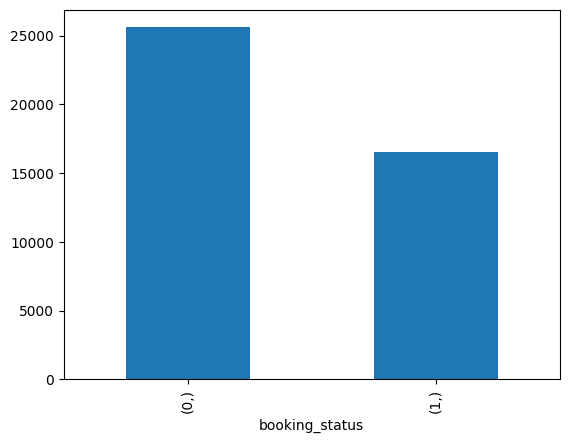

In [16]:
y.value_counts().plot(kind='bar')

In [17]:
#Step 4:preprocessing on x
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [18]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [19]:
X_pre = num_pipe.fit_transform(x)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


In [20]:
#Step 5: Apply train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, y, test_size=0.2, random_state=42)

In [21]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [22]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [23]:
xtest.head() #test data is unseen to neural network

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [24]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [25]:
xtrain.shape

(33680, 17)

In [26]:
ytrain.shape

(33680, 1)

In [27]:
#Step 6:Build the neural network
from keras.models import Sequential
from keras.layers import Dense, Input,Dropout


In [28]:
# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=64, activation='relu'))
# Add the dropout Layer 1
model.add(Dropout(rate=0.4))
# Add the Hidden Layer 2
model.add(Dense(units=32, activation='relu'))
# Add the dropout Layer 2
model.add(Dropout(rate=0.3))
# Add the output Layer
model.add(Dense(units=1, activation='sigmoid'))


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #any matrics you can show

In [31]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
842/842 [==============================] - 11s 7ms/step - loss: 0.5288 - accuracy: 0.7355 - val_loss: 0.4847 - val_accuracy: 0.7699
Epoch 2/100
842/842 [==============================] - 4s 4ms/step - loss: 0.4857 - accuracy: 0.7698 - val_loss: 0.4757 - val_accuracy: 0.7740
Epoch 3/100
842/842 [==============================] - 5s 6ms/step - loss: 0.4766 - accuracy: 0.7750 - val_loss: 0.4737 - val_accuracy: 0.7773
Epoch 4/100
842/842 [==============================] - 4s 5ms/step - loss: 0.4730 - accuracy: 0.7782 - val_loss: 0.4668 - val_accuracy: 0.7812
Epoch 5/100
842/842 [==============================] - 4s 5ms/step - loss: 0.4703 - accuracy: 0.7805 - val_loss: 0.4648 - val_accuracy: 0.7838
Epoch 6/100
842/842 [==============================] - 5s 6ms/step - loss: 0.4661 - accuracy: 0.7835 - val_loss: 0.4634 - val_accuracy: 0.7882
Epoch 7/100
842/842 [==============================] - 3s 4ms/step - loss: 0.4647 - accuracy: 0.7838 - val_loss: 0.4626 - val_accuracy: 0.787

In [32]:
#Evaluate the model in train and test
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 4s 4ms/step - loss: 0.4200 - accuracy: 0.8120


[0.420049786567688, 0.8120249509811401]

In [33]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 1s 2ms/step - loss: 0.4292 - accuracy: 0.8068


[0.42918860912323, 0.806769609451294]

In [34]:
#Step 6:Plot the learning curve
hist.history['loss']

[0.5288231372833252,
 0.48572519421577454,
 0.47661837935447693,
 0.4729967415332794,
 0.4703144133090973,
 0.46613845229148865,
 0.46465739607810974,
 0.46152108907699585,
 0.46197080612182617,
 0.4592221677303314,
 0.4589841663837433,
 0.45877447724342346,
 0.45729851722717285,
 0.45772188901901245,
 0.45541632175445557,
 0.4548879861831665,
 0.45146802067756653,
 0.4527350068092346,
 0.45264214277267456,
 0.45301148295402527,
 0.4515688121318817,
 0.45046961307525635,
 0.4510714113712311,
 0.4498998820781708,
 0.4472523629665375,
 0.4478597640991211,
 0.4494651257991791,
 0.4484330713748932,
 0.4474084675312042,
 0.44465556740760803,
 0.44642403721809387,
 0.44682782888412476,
 0.44502246379852295,
 0.44540855288505554,
 0.44280824065208435,
 0.44265565276145935,
 0.44289425015449524,
 0.4443618655204773,
 0.4449722170829773,
 0.4436837136745453,
 0.4416314363479614,
 0.4430330991744995,
 0.44411733746528625,
 0.4422100782394409,
 0.4415125250816345,
 0.4388669729232788,
 0.44234302

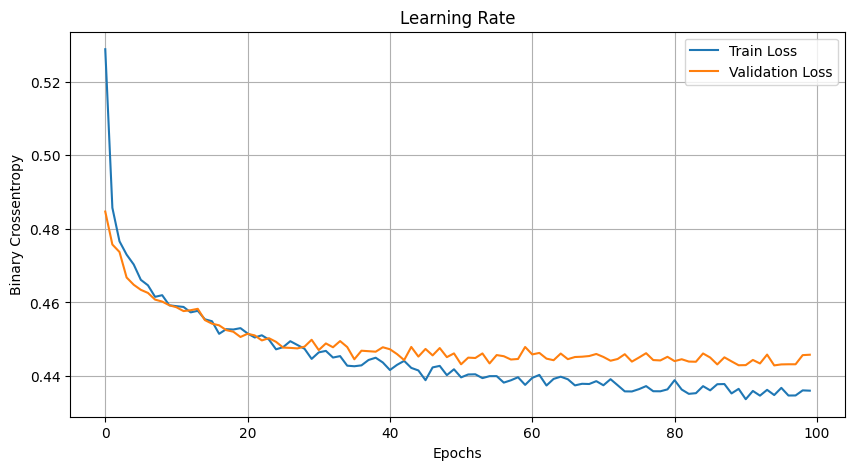

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.title('Learning Rate')
plt.legend()
plt.grid()
plt.show()

In [42]:
#Step 7:Predict the results for train and test
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)


264/264 [==============================] - 1s 3ms/step


In [43]:
yprob_train[0:5]

array([[0.01068742],
       [0.14634381],
       [0.78470427],
       [0.7880634 ],
       [0.8357486 ]], dtype=float32)

In [44]:
yprob_test[0:5]

array([[0.03399236],
       [0.898983  ],
       [0.34422523],
       [0.01292301],
       [0.18115272]], dtype=float32)

In [45]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

In [46]:
ypred_train[0:5]

[0, 0, 1, 1, 1]

In [47]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [48]:
ypred_test[0:5]

[0, 1, 0, 0, 0]

In [49]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


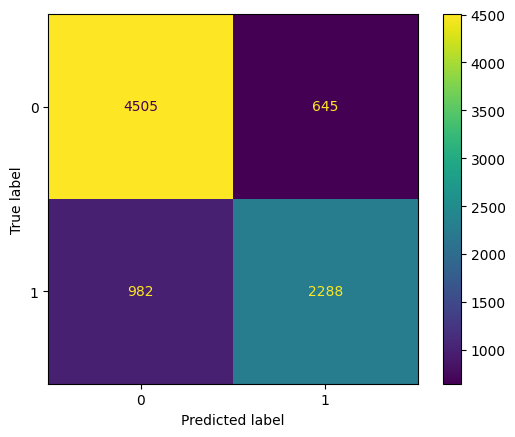

In [50]:
#Step 8:Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      5150
           1       0.78      0.70      0.74      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.81      0.81      0.80      8420



In [53]:
#Save the model
model.save('BookingModel.keras')

In [55]:
#Loding model to another notebook
from keras.models import load_model
m = load_model("/content/BookingModel.keras")
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
#Step 9:Out of sample prediction
xnew = pd.read_csv('/content/booking_test.csv')
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [57]:
xnew2 = xnew.drop(columns=['id'])

In [58]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [59]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [64]:
#Step 10 :
probs = model.predict(xnew_pre)
probs[0:5]

878/878 [==============================] - 1s 2ms/step


array([[0.07743707],
       [0.02174544],
       [0.2931124 ],
       [0.1444105 ],
       [0.6145368 ]], dtype=float32)

In [65]:
preds = [1 if prob>=0.5 else 0 for prob in probs]
preds[0:5]

[0, 0, 0, 0, 1]

In [66]:
#Save above result in dataframe
df_final = xnew[['id']]
df_final

,id
0,42100
1,42101
2,42102
3,42103
4,42104
...,...
28063,70163
28064,70164
28065,70165
28066,70166


In [69]:
df_final['booking_status'] = preds
df_final['probability'] = probs

<ipython-input-69-92bd6e8c5ada>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['booking_status'] = preds
<ipython-input-69-92bd6e8c5ada>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['probability'] = probs


In [70]:
df_final['booking_status'].value_counts()

booking_status
0    18402
1     9666
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

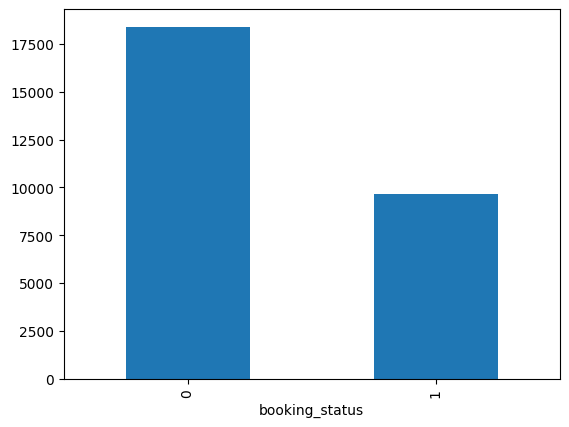

In [71]:
df_final['booking_status'].value_counts().plot(kind='bar')

In [73]:
df_final.to_csv('BookingResults.csv',index=False)